In [3]:
import requests

url = "https://api.met.no/weatherapi/locationforecast/2.0/compact?lat=59.91&lon=10.75"
headers = {
    "User-Agent": "DittNavn/DinEpost"  # Yr.no krever at du identifiserer deg
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    weather_data = response.json()  # Konverterer JSON til en Python-dictionary
    print(weather_data)
else:
    print(f"Feil! Statuskode: {response.status_code}")


{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [10.75, 59.91, 3]}, 'properties': {'meta': {'updated_at': '2025-02-21T12:27:54Z', 'units': {'air_pressure_at_sea_level': 'hPa', 'air_temperature': 'celsius', 'cloud_area_fraction': '%', 'precipitation_amount': 'mm', 'relative_humidity': '%', 'wind_from_direction': 'degrees', 'wind_speed': 'm/s'}}, 'timeseries': [{'time': '2025-02-21T12:00:00Z', 'data': {'instant': {'details': {'air_pressure_at_sea_level': 1017.2, 'air_temperature': 3.1, 'cloud_area_fraction': 100.0, 'relative_humidity': 99.1, 'wind_from_direction': 170.2, 'wind_speed': 2.1}}, 'next_12_hours': {'summary': {'symbol_code': 'lightrain'}, 'details': {}}, 'next_1_hours': {'summary': {'symbol_code': 'fog'}, 'details': {'precipitation_amount': 0.0}}, 'next_6_hours': {'summary': {'symbol_code': 'lightrain'}, 'details': {'precipitation_amount': 0.6}}}}, {'time': '2025-02-21T13:00:00Z', 'data': {'instant': {'details': {'air_pressure_at_sea_level': 1017.1, 'air_tempe

In [4]:
import pandas as pd

# Eksempel: hente temperaturdata
timeseries = weather_data["properties"]["timeseries"]

# Lage en liste med dato og temperatur
weather_list = [
    {"time": entry["time"], "temperature": entry["data"]["instant"]["details"]["air_temperature"]}
    for entry in timeseries
]

df = pd.DataFrame(weather_list)  # Konvertere til DataFrame
print(df.head())  # Se de første radene


                   time  temperature
0  2025-02-21T12:00:00Z          3.1
1  2025-02-21T13:00:00Z          3.2
2  2025-02-21T14:00:00Z          3.1
3  2025-02-21T15:00:00Z          3.1
4  2025-02-21T16:00:00Z          3.0


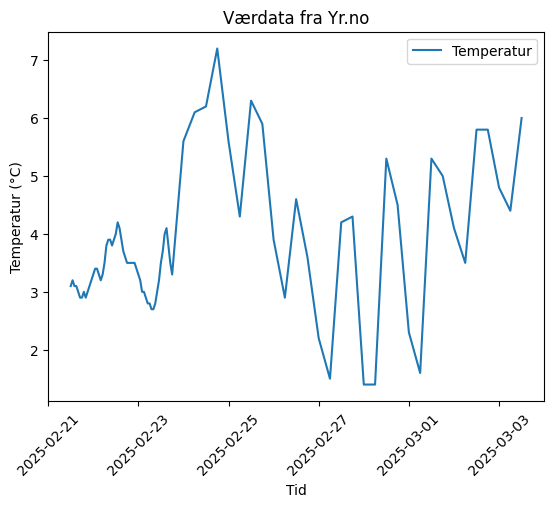

In [5]:
import matplotlib.pyplot as plt

df["time"] = pd.to_datetime(df["time"])  # Konverterer til datetime-format
plt.plot(df["time"], df["temperature"], label="Temperatur")
plt.xlabel("Tid")
plt.ylabel("Temperatur (°C)")
plt.title("Værdata fra Yr.no")
plt.legend()
plt.xticks(rotation=45)
plt.show()
